## Unsupervised Learning
## Project: Creating Customer Segments

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3366,5403,12974,4400,5977,1744
2,11594,7779,12144,3252,8035,3029


Rank of Customer 0 in freshness is 193
Rank of Customer 0 in Milk is 372
Rank of Customer 0 in Grocery is 315
Rank of Customer 0 in Frozen is 239
Rank of Customer 0 in Detergents_Paper is 309
Rank of Customer 0 in Delicatessen is 325

Rank of Customer 1 in freshness is 117
Rank of Customer 1 in Milk is 283
Rank of Customer 1 in Grocery is 360
Rank of Customer 1 in Frozen is 349
Rank of Customer 1 in Detergents_Paper is 370
Rank of Customer 1 in Delicatessen is 321

Rank of Customer 2 in freshness is 274
Rank of Customer 2 in Milk is 345
Rank of Customer 2 in Grocery is 352
Rank of Customer 2 in Frozen is 320
Rank of Customer 2 in Detergents_Paper is 401
Rank of Customer 2 in Delicatessen is 397


  Observations  are written in next cell   


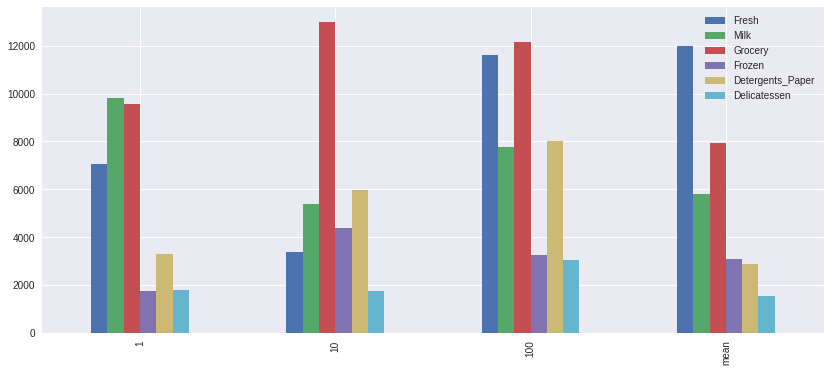

In [3]:
### TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,10,100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"

display(samples)
samples1 = pd.DataFrame(data, columns = data.keys()).reset_index(drop = True)
samples2 = samples1.sort_values(by=["Fresh"],ascending=True).reset_index(drop = True)
samples3 = samples1.sort_values(by=["Milk"],ascending=True).reset_index(drop = True)
samples4 = samples1.sort_values(by=["Grocery"],ascending=True).reset_index(drop = True)
samples5 = samples1.sort_values(by=["Frozen"],ascending=True).reset_index(drop = True)
samples6 = samples1.sort_values(by=["Detergents_Paper"],ascending=True).reset_index(drop = True)
samples7 = samples1.sort_values(by=["Delicatessen"],ascending=True).reset_index(drop = True)

columns = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]


print "Rank of Customer 0 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[1]["Fresh"]].index.tolist()[0])
print "Rank of Customer 0 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[1]["Milk"]].index.tolist()[0])
print "Rank of Customer 0 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[1]["Grocery"]].index.tolist()[0])
print "Rank of Customer 0 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[1]["Frozen"]].index.tolist()[0])
print "Rank of Customer 0 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[1]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 0 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[1]["Delicatessen"]].index.tolist()[0])
print ""

print "Rank of Customer 1 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[10]["Fresh"]].index.tolist()[0])
print "Rank of Customer 1 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[10]["Milk"]].index.tolist()[0])
print "Rank of Customer 1 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[10]["Grocery"]].index.tolist()[0])
print "Rank of Customer 1 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[10]["Frozen"]].index.tolist()[0])
print "Rank of Customer 1 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[10]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 1 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[10]["Delicatessen"]].index.tolist()[0])
print ""
print "Rank of Customer 2 in freshness is %d" % ( samples2[samples2.Fresh == samples1.iloc[100]["Fresh"]].index.tolist()[0])
print "Rank of Customer 2 in Milk is %d" % ( samples3[samples3.Milk == samples1.iloc[100]["Milk"]].index.tolist()[0])
print "Rank of Customer 2 in Grocery is %d" % ( samples4[samples4.Grocery == samples1.iloc[100]["Grocery"]].index.tolist()[0])
print "Rank of Customer 2 in Frozen is %d" % ( samples5[samples5.Frozen == samples1.iloc[100]["Frozen"]].index.tolist()[0])
print "Rank of Customer 2 in Detergents_Paper is %d" % ( samples6[samples6.Detergents_Paper == 
                                                      samples1.iloc[100]["Detergents_Paper"]].index.tolist()[0])
print "Rank of Customer 2 in Delicatessen is %d" % ( samples7[samples7.Delicatessen == 
                                                         samples1.iloc[100]["Delicatessen"]].index.tolist()[0])
print ""



import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

print ""

print "  Observations  are written in next cell   "


**Freshness**
- Customer 0 < Customer 1 < Customer 2 
- Customer 2 is a replica of average customer, where as customer 0 isn't much worried about freshness of the product, whereas cutomer 1 preference is not freshness of the product.

**Milk**
- Customer 1 < Customer 2 < Customer 1
- Customer 2 is a replica of average customer, where as customer 0 and 1 uses milk more than an average customer.

**Grocery**
- Customer 0 < Customer 2 < Customer 1
- All three customers buys groceries more than an average customer. Customer 0 lies around 70th percentile, where customer 1 and customer 2 lies around 90 / 85 th percentile, which indicates they purchase groceries much more than an average customer.

**Frozen**
- Customer 0 < Customer 2 < Customer 1
- Customer 2 is a replica of average customer, where as customer 0 stands at 55th percentile (approx half of the customers purchase less then customer 0). Customer 1 stands at 75th percentile. (approx 3/4 of customers buy less than cusstomer 1)

**Detergents_Paper**
- Customer 0 < Customer 1 < Customer 2
- All three customers buys detergents_paper more than an average customer. Customer 0 lies around 70th percentile, where customer 1 and customer 2 lies around 90 / 95 th percentile, which indicates they purchase detergents_paper much more than an average customer.

**Delicatessen**
- Customer 0 == Customer 1 < Customer 2
- Customer 0 /1  is a replica of above average customer, where they stand at approximately 75th percentile (approx 3/4 of the customers purchase less then customer 0 /1 ). Customer 2 stands at 90th percentile. (approx 9/10 of customers buy less than cusstomer 2)

## Observations

**Rank**
Value - ranges from 0 - 439. Higher rank customer pruchases more products of respective category.

*Customer 0 *:-

Rank of Customer 0 in freshness is 193:
Rank of Customer 0 in Milk is 372
Rank of Customer 0 in Grocery is 315
Rank of Customer 0 in Frozen is 239
Rank of Customer 0 in Detergents_Paper is 309
Rank of Customer 0 in Delicatessen is 325

Customer 0 isn't picky about freshness, but purchases other products more than an average customer. When compared to an average customer he can described as a retail customer.

Rank of Customer 1 in freshness is 117
Rank of Customer 1 in Milk is 283
Rank of Customer 1 in Grocery is 360
Rank of Customer 1 in Frozen is 349
Rank of Customer 1 in Detergents_Paper is 370
Rank of Customer 1 in Delicatessen is 321

Customer 1 is not concerned about freshness, he likes more frozen / grozeries. He likes shops where there are more frozen food is available. Might be coffee / retail customer.

Rank of Customer 2 in freshness is 274
Rank of Customer 2 in Milk is 345
Rank of Customer 2 in Grocery is 352
Rank of Customer 2 in Frozen is 320
Rank of Customer 2 in Detergents_Paper is 401
Rank of Customer 2 in Delicatessen is 397

Customer 2 cares about freshness of a product, He spends more on all categories when compared to an average customer.  Might be a grocery market or retail customer.


### Implementation: Feature Relevance

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
data_with_grocery = data
data_only_grocery = data['Grocery']
data_without_grocery = data_with_grocery.drop(['Grocery'], axis = 1)
new_data = pd.DataFrame(data_without_grocery)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data_only_grocery, test_size=0.25,random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(max_depth=4,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
#After calculating each feature score, following scores are reported
score_fresh = -0.192424
score_milk = 0.431992
score_grocery = 0.722092
score_frozen = 0.138701684746
score_detergents_paper= 0.578558017871
score_delicatessen = -0.861635423216
print "score for Milk with max-depth 4 is    %f" % score_milk
print "score for Fresh with max-depth 4 is   %f " %score_fresh
print "score for Grocery with max-depth 4 is %f " %score_grocery
print "score for Frozen with max-depth 4 is  %f " %score_frozen
print "score for Detergents_Paper with max-depth 4 is  %f " %score_detergents_paper
print "score for Delicatessen with max-depth 4 is  %f " %score_delicatessen

print "R^2 value of groceries is %f" % r2_score(y_test, y_pred) 

score for Milk with max-depth 4 is    0.431992
score for Fresh with max-depth 4 is   -0.192424 
score for Grocery with max-depth 4 is 0.722092 
score for Frozen with max-depth 4 is  0.138702 
score for Detergents_Paper with max-depth 4 is  0.578558 
score for Delicatessen with max-depth 4 is  -0.861635 
R^2 value of groceries is 0.722092


### Observations on R^2 - Coefficient of determination

I attempted to predict all the features, out of which Grocery came up with the bestscore. 
prediction score is 0.722092
R^2 value is 0.722092
Since the R^2 value is closer to 1 and above 0.5, it can implied that model fits the data correctly.

The features with highest or better prediction scores would not help in identifying customers' spending habits, since they can be directly fetched from the raw data.
In order to identify customers' spending habits I would go with following order.
Delicatessen > Fresh > Frozen > Milk > Detergents_paper > Grocery

### Visualize Feature Distributions

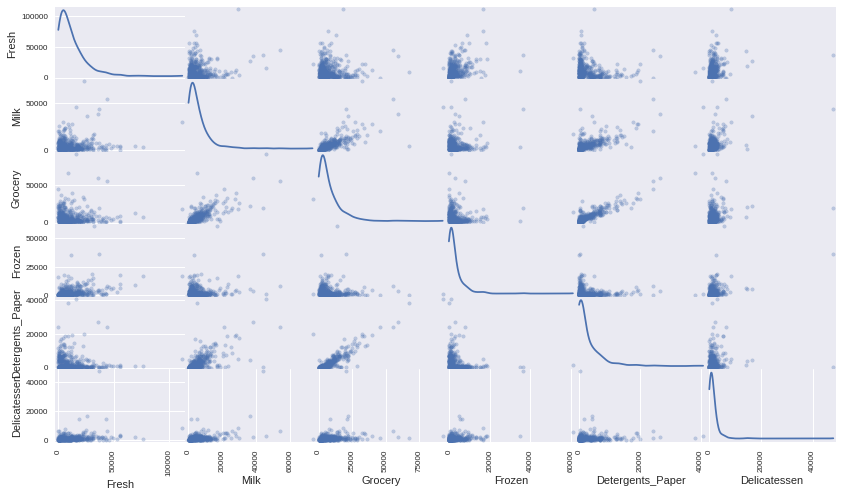

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Correlation 

Following pairs exhibit correlation, since the graph has slope of about 45degrees. 
Milk & Grocery, Grocery & Detergents_Paper and a bit lesser correlatin between Milk & Detergents_Paper.

Whenever there is a 45 degree slope, there will be more correlation between X and Y axis. Hence considering one of the X or Y axis should help in segmenting the customers rather than using both (redundant and leads to overfitting).

*Milk & Grocery*:
- Data is skewed to the right and more towards zero. An approx 45 degree slope is observed. 

*Grocery & Detergent_Paper*:
- Data is skewed to the right little less than Milk & Grocery. This combination approximately maintains 45 degree slope. 

*Milk & Detergent_Paper*:
- Data is skewed to the right and more data is observed closer to zero. Median value is smaller then mean since some of the data is spread to extremes in the graph. Outliers can affect the prediction capability. It is important to remove / trim the outliers before proceeding further.

With above graphs, we can safely remove one of the two features (grocery or detergent_papers) and can still attempt to predict the customer spending. This confirms the suspicion about the grocery which can be directly predicted from the data. The data is not normally distributed. The values of mean and median are not close enough for most of the features. Most of the data is closer towards the intersection of axis. In some graphs outliers can be observed which might affect the ability to predict correctly. May be the logarithmic function might help here since all the data is close zero.

## Data Preprocessing

### Implementation: Feature Scaling

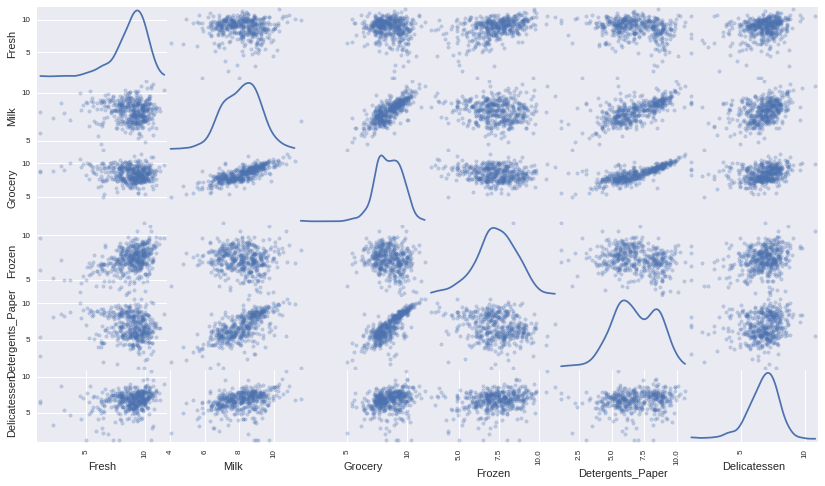

In [9]:
# Scale the data using the natural logarithm
from scipy import stats

# Prob = stats.probplot(data, dist=stats.norm, plot=ax1)
log_data = np.log(data) #None

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observations

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988


### Implementation: Outlier Detections

In [11]:
# For each feature find the data points with extreme high or low values
import collections
outliers  = []
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    array = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values
    for i in array:
        outliers.append(i)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

len_bad_data = (data.shape[0] - good_data.shape[0])
len_outliers = len(outliers)
print "Total bad points are %d" % len_bad_data
print "Total outliers are %d" % len_outliers
print "Duplicate outliers are %d" % (len_outliers - len_bad_data -1)
dup_outlier_indices =  [item for item, count in collections.Counter(outliers).items() if count > 1]
print "Duplicate outlier's indices are %s" % dup_outlier_indices

#reference
#http://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Total bad points are 42
Total outliers are 48
Duplicate outliers are 5
Duplicate outlier's indices are [128, 154, 65, 66, 75]


### Observations on outliers 

**Answer:**
Duplicate outlier's indices are [128, 154, 65, 66, 75]

Since the outliers corrupt the prediction capability it is recommended to remove the outliers.

The total number of inputs are ~440 and the outliers are ~42. Removing 10% of the data wouldn't be a good option since we will loose so much of data. Hence only removing duplicate outliers (5) would be a better option here.  


## Feature Transformation using PCA

### Implementation: PCA

Explained variance Ratio is [ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]
Total explained variance of first and second is 0.725253 
Total explained variance of first four is 0.976745 


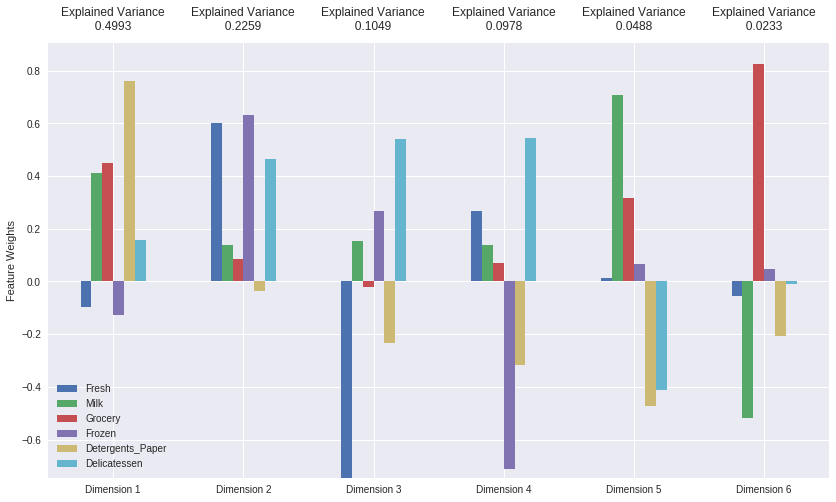

In [12]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features

pca = PCA(n_components=len(good_data.keys()))

pca.fit(good_data)
print "Explained variance Ratio is %s" %(pca.explained_variance_ratio_) 

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

explained_variance_first_second = 0
for i in range(0,2):
    explained_variance_first_second += pca.explained_variance_ratio_[i]
print "Total explained variance of first and second is %f " % explained_variance_first_second

explained_variance_firstfour = 0
for i in range(0,5):
    explained_variance_firstfour += pca.explained_variance_ratio_[i]
print "Total explained variance of first four is %f " % explained_variance_firstfour

### Observation on explained variance

 More weight for a feature A, feature B in X PCA indicates that In X PCA an increase in the value of feature A correlates to increase in the value of feature B.

Total explained variance of first and second is 0.725253. Considering 6 features this value is good.

Total explained variance of first four is 0.976745. This is a very good value, which explains that with first forr PCA we could segregate the customers. 

**First principal component**
- It is strongly correlated to Detergents_paper / Grocery / Milk / Delicatessan
- It increases with increase in values of Detergents_paper / Grocery
- It can be viewed as a measure of quality for Detergents_paper / Grocery / Milk
- The high correlation of Detergents_paper indicates that following the first PCA would result in customer who purchase more Detergents_paper
- He might be a retail customer 

**Second principal component**
- It is strongly correlated to Fresh / Frozen / Delicatessan
- It increases with increase in values of Fresh / Frozen / Delicatessan
- It can be viewed as a measure of quality for Fresh / Frozen / Delicatessan
- The high correlation of Fresh / Frozen indicates that following the second PCA would result in customer who purchase more Fresh & Frozen products
- He might be a restaurant customer 

**Third principal component**
- It is strongly correlated to Freshness / Delicatessan
- It increases with decrease in values of Freshness and increase in value of Delicatessan
- It can be viewed as a measure of low quality for Freshness and good quality for Delicatessan
- The high correlation of Freshness indicates that following the third PCA would result in customer who prefers product that are not fresh
- He vaguely might be a hotel customer

**Fourth principal component**
- It is strongly correlated to Frozen / Delicatessan / Milk
- It increases with decrease in values of Frozen and increase in value of Delicatessan
- It can be viewed as a measure of low quality for Frozen and good quality for Delicatessan
- The high correlation of Frozen indicates that following the fouth PCA would result in customer he prefers product that are not frozen
- He might be a coffee customer


In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
1,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
2,2.5291,1.3485,0.1094,-0.2050,-0.5879,-0.0808


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [14]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples =  pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8820,0.4617
1,2.1793,0.5069
2,2.5291,1.3485


## Visualizing a Biplot

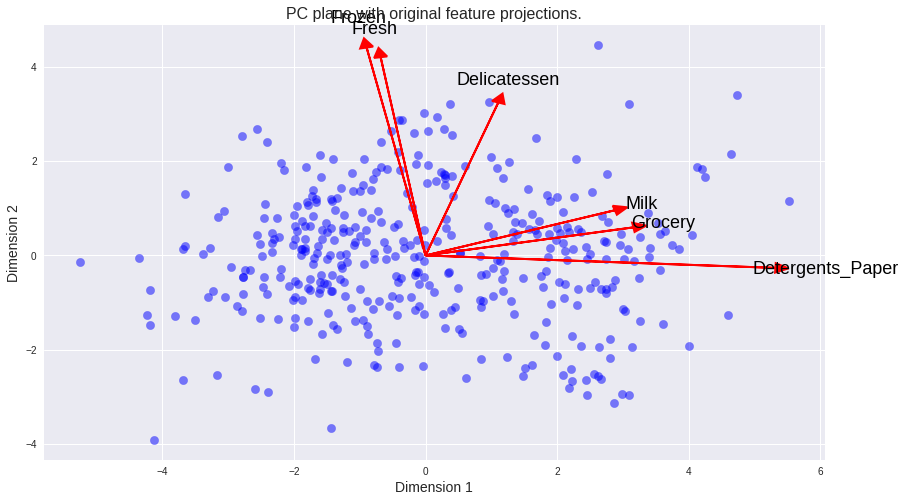

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Detergents / Milk/ grocery are strongly correlated. 
Freshness / Frozen are strongly correlated and both together can be easily correlated to delicatessen.

## Clustering

**K-Means clustering algorithm**

*Properties*
   - There are always K clusters.
   - There is always at least one item in each cluster.
   - The clusters are non-hierarchical and they do not overlap.
   - Every member of a cluster is closer to its cluster than any other cluster because closeness does not always involve the 'center' of clusters.

*Advantages*
   - Low time complexity (linear) (When more variables are there, there would be significant difference)
   - Works great when the clusters are in spherical shape or evenly distributed 
   - Easy to implement and interpret 
   - K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.
    
**Gaussian Mixture Model Clustering algorithm **

*Properties*
   - GMM is a super set of K-means. k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0.

*Advantages*
   - GMM works well in case of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans.
   - GMM comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.
   


** Hard or Soft assignment**:
- Let's says we are aiming to break them into three clusters, as above. K means will start with the assumption that a given data point belongs to one cluster.
- Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a X cluster. In the next iteration, we might revise that belief, and be certain that it belongs to the Y cluster.
However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".
- What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the red cluster, but also 10% chance its in green, 20% chance it might be blue. That's a soft assignment.
- The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments.
- As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.



There is no clear indication of which algorithm should be used as of now.I would give K-Means a try.





#References

    1. http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
    2. https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
    3. https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm


### Implementation: Creating Clusters 

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=42).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,clusterer.labels_, metric='euclidean')
print "score with 2 clusters is %f" % 0.447157742293
print "score with 3 clusters is %f" % 0.36398647984
print "score with 4 clusters is %f" % 0.331150954285
print "score with 5 clusters is %f" % 0.353193403287
print "score with 6 clusters is %f" % 0.363712346094
print "score with 7 clusters is %f" % 0.355334447306
print "score with 8 clusters is %f" % 0.368991429627
print "score with 9 clusters is %f" % 0.367452867107

score with 2 clusters is 0.447158
score with 3 clusters is 0.363986
score with 4 clusters is 0.331151
score with 5 clusters is 0.353193
score with 6 clusters is 0.363712
score with 7 clusters is 0.355334
score with 8 clusters is 0.368991
score with 9 clusters is 0.367453


### Silhouette scores

2 clusters has the best score .

    score with 2 clusters is 0.447158
    score with 3 clusters is 0.363986
    score with 4 clusters is 0.331151
    score with 5 clusters is 0.353193
    score with 6 clusters is 0.363712
    score with 7 clusters is 0.355334
    score with 8 clusters is 0.368991
    score with 9 clusters is 0.367453

### Cluster Visualization

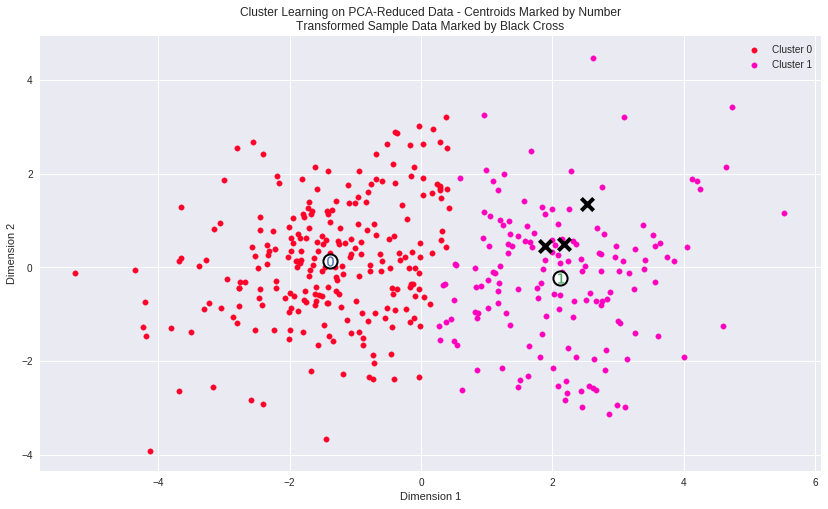

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery

In [20]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


### Identifying Customer Segments

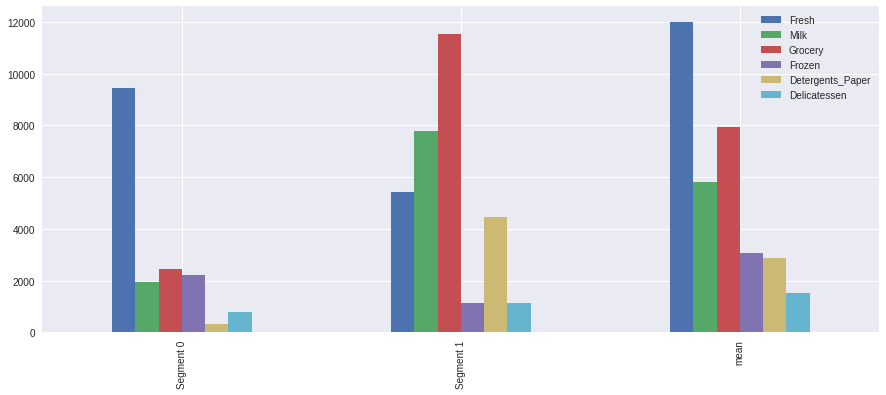

In [21]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

**Observations:**

Following are the Median values of actual product categories
Fresh - 8504 
Milk - 3627
Grocery - 4755
Frozen - 1526
Detergents_Paper - 816.5
Delicatessen - 965.5

Median separates both the segments . (Higher end of fresh / frozen in segment zero and reverse in other categories.)
Segment 0:-
Marks the higher end of freshness / frozen food. 
Lower end of Milk / Grocery / Detergents / Delicatessen

Segment 1:-
Marks the lower end of freshness / frozen food. 
Higher end of Milk / Grocery / Detergents / Delicatessen

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
print reduced_samples

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
   Dimension 1  Dimension 2
0     1.882034     0.461741
1     2.179314     0.506880
2     2.529127     1.348456


**Observations:**
All the predictions were accurate.
All the customers proved to be retail customers. In my prediction during earlier stage i thought customer 1  could be coffee/grocery customer (because of more frozen category) but the customer is more oriented towards retail / grocery. 

### A/B Testing

Applying any change in delivery service to all customers is not a good idea, some of them may not like it and unsubscribe.

** Segment 0 / Cluster 0 **
- Major factors are Freshness / Frozen 
- Change in delivery service from 5 day to 3 day would adversely affect because the customer base would like to purchase fresh products

** Segment 1 / Cluster 1 **
- Major factors are Milk / Grocery / Detergent_Paper 
- Change in delivery service from 5 day to 3 day would positively affect the customer base. Cluster 1 customer base is not too picky about freshness so groceries/milk and detergent paper can be supplied on alternate days rather than on 5 days a week

**A/B Testing**
- It has to be done on same cluster group
- Dividing the same cluster in to two sets and conducting A/B testing helps in verifying if the change in delivery service model works
- Divide Cluster 1 in to two parts say A & B. Let A be control group and B be the experiment group. Apply the changed delivery service model on group B and after considerable amount of time (say 2 months), we can verify if the customer service experience has improved on group B when compared to group A.
- After A/B testing, if there is an improvement in customer service and sales, the change in delivery service should be roled on to group A. (We expect this to happen). 

### Visualizing Underlying Distributions (Include Channel / Region)
### Label the data with HoReCa / Retailer tags

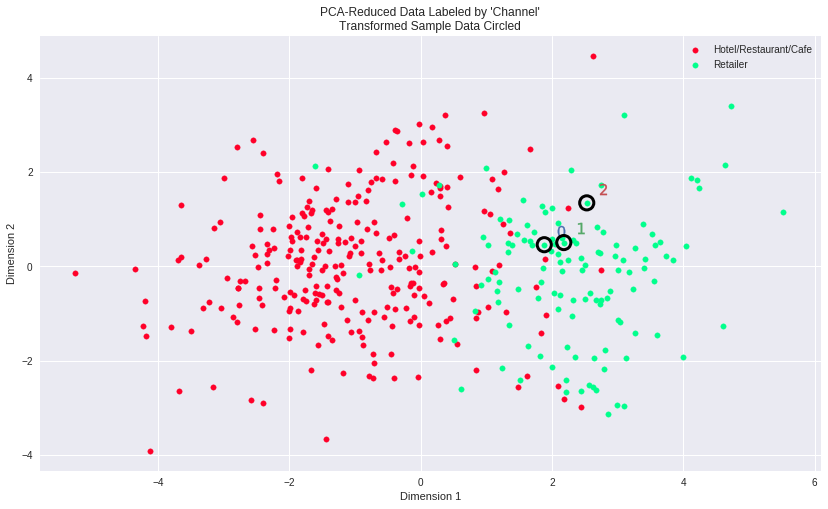

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Validating the predictions


The predictions for the samples are mostly correct. 

Before modelling, i wrongly guessed that customer 1 might be coffee / restaurant guy, but after modelling he falls in retail domain. It is an mistake in manual guess (assumption that only frozen plays a major role back fired). 
